In [10]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [11]:
X = 6* np.random.rand(100, 1) - 6
y = 0.3 * X**2 + X + 2 + np.random.randn(100, 1)

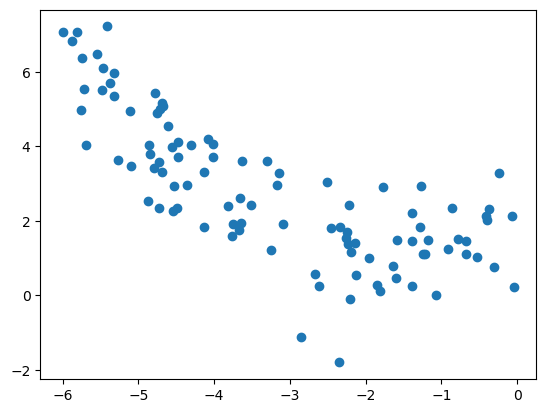

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)

In [13]:
model = LinearRegression()
model.fit(X, y)
y_hat = model.predict(X)

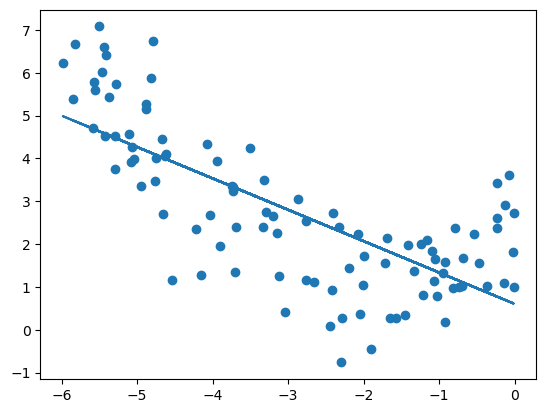

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)
ax.plot(X, y_hat)

In [6]:
X_poly = PolynomialFeatures(3).fit_transform(X)

In [7]:
X_poly.shape

(100, 4)

In [8]:
model2 = Ridge(alpha=0.003)
model2.fit(X_poly, y)
y_hat2 = model2.predict(X_poly)
X_b = np.linspace(X.min(), X.max(), 10).reshape(-1, 1)
X_b_poly = PolynomialFeatures(3).fit_transform(X_b)
y_b_hat = model2.predict(X_b_poly)

Text(0.5, 0, 'X')

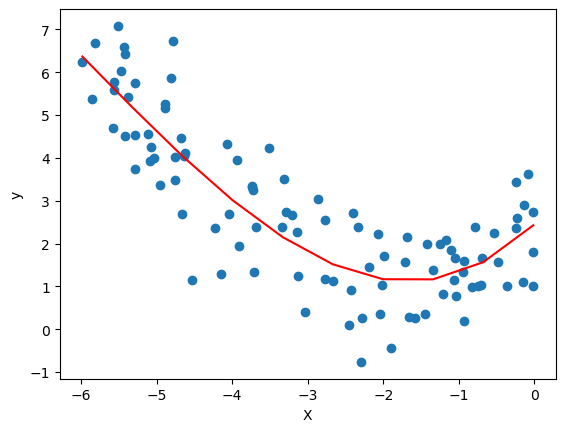

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)
ax.plot(X_b, y_b_hat, color="red")
ax.set_ylabel("y")
ax.set_xlabel("X")

In [20]:
from sklearn.pipeline import make_pipeline

In [26]:
pipeline = make_pipeline(PolynomialFeatures(5), 
                          LinearRegression())

In [27]:
pipeline.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [28]:
X_b = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

In [29]:
y_hat_b = pipeline.predict(X_b)

Text(0.5, 0, 'X')

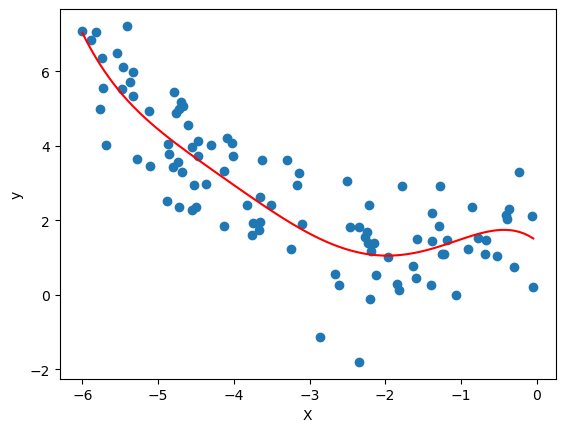

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)
ax.plot(X_b, y_hat_b, color="red")
ax.set_ylabel("y")
ax.set_xlabel("X")

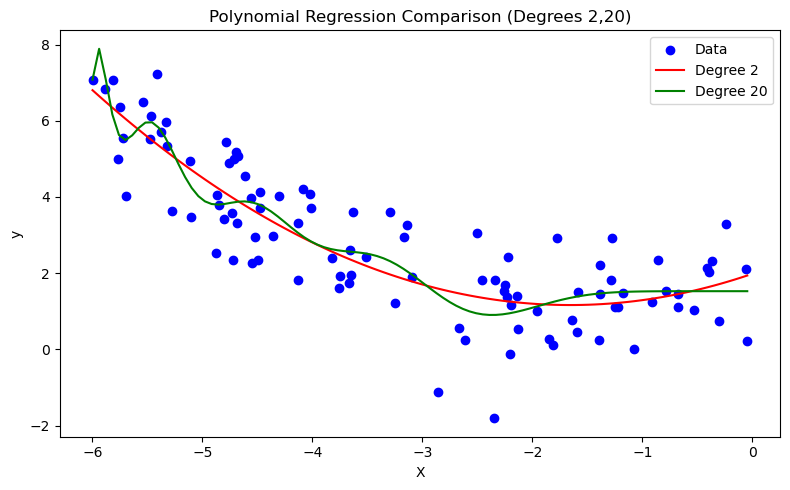

In [35]:

degrees = [2,20]
colors = ['red', 'green']

X_b = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.scatter(X, y, color='blue', label='Data') 

for degree, color in zip(degrees, colors):
    pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    pipeline.fit(X, y)
    y_hat_b = pipeline.predict(X_b)
    ax.plot(X_b, y_hat_b, color=color, label=f'Degree {degree}')

ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_title("Polynomial Regression Comparison (Degrees 2,20)")
ax.legend()
plt.tight_layout()
plt.show()
